# Load the CSV file into a Pandas DataFrame

In [1]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import numpy as np
threshold=1
# org = pd.read_csv("train.csv")

In [2]:
data_path = "E:\\Research work\\assessment checker research\\learning-agency-lab-automated-essay-scoring-2\\"

In [3]:
# df_org = org
df_gemini = pd.read_csv("results_gemini/Holistic_assessment_results_by_rubric.csv")


# Data visualization CM

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define a function to generate and save confusion matrix
def generate_confusion_matrix(actual_scores, predicted_scores, title, graph_path):
    # Modify predicted scores to have a single class for scores greater than 6
    m_predicted_scores = [score // 4 if score > 6 else score for score in predicted_scores]

    # Define the unique labels in the score range
    score_labels = sorted(set(actual_scores + m_predicted_scores))

    # Create the confusion matrix
    cm = confusion_matrix(actual_scores, m_predicted_scores, labels=score_labels)

    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=score_labels, columns=score_labels)

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.set(font_scale=0.8)

    # Create a heatmap with white background
    sns.heatmap(cm_df, annot=True, cmap='YlGnBu', fmt='d', annot_kws={"size": 10}, cbar=False, linewidths=0.5, square=True, ax=ax)

    # Set labels and title
    ax.set_xlabel('Score Assigned by Gemini')
    ax.set_ylabel('Score assigned by Human Raters')
    ax.set_title(title)

    # Rotate the tick labels for better readability if needed
    plt.xticks(rotation=0, ha='right')
    plt.yticks(rotation=0)

    # Save the plot
    plt.savefig(graph_path + "cm.png", bbox_inches='tight')

    # Show the plot
    plt.show()


5074 5074


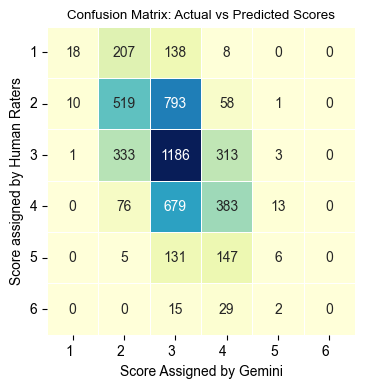

In [5]:

# Ensure the necessary columns exist and handle missing values
if 'score' in df_gemini.columns and 'Score_gemini' in df_gemini.columns:
    df_gemini.dropna(subset=['Score_gemini', 'score'], inplace=True)
    
    # Ensure scores are integers between 1 and 6
    actual_scores = df_gemini['score'].astype(int).tolist()
    predicted_scores = df_gemini['Score_gemini'].astype(int).tolist()
    print(len(actual_scores), len(predicted_scores))
    # Define the title and path for the graphs
    title = "Confusion Matrix: Actual vs Predicted Scores"
    graph_path = data_path + "reports_graphs/Confusion_Matrix_"
    
    # Generate and save the confusion matrix
    generate_confusion_matrix(actual_scores, predicted_scores, title, graph_path)
else:
    print(f"The necessary columns 'score' and/or 'Score_gemini' do not exist in the dataset.")


# Kohen Kappa Score 

In [6]:
from sklearn.metrics import cohen_kappa_score


# Calculate Cohen's Kappa
kappa = cohen_kappa_score(actual_scores, predicted_scores)

print("Cohen's Kappa Score:", kappa)


Cohen's Kappa Score: 0.1495480817623268
